# ПРОЕКТ: Прогнозирование оттока клиентов

# 1. План проекта

Описание услуг:  
Оператор предоставляет два основных типа услуг:
1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).

Также доступны такие услуги:
- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

Описание данных:  
Данные состоят из файлов, полученных из разных источников:
- `contract_new.csv` — информация о договоре;
- `personal_new.csv` — персональные данные клиента;
- `internet_new.csv` — информация об интернет-услугах;
- `phone_new.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.  
Информация о договорах актуальна на 1 февраля 2020.

Обозначения признаков:  

- BeginDate – дата начала пользования услугами,
- EndDate – дата окончания пользования услугами,
- Type – тип оплаты: ежемесячный, годовой и тд,
- PaperlessBilling – безналичный расчет,
- PaymentMethod – способ оплаты,
- MonthlyCharges – ежемесячные траты на услуги,
- TotalCharges – всего потрачено денег на услуги,
- Dependents – наличие иждивенцев,
- Senior Citizen – наличие пенсионного статуса по возрасту,
- Partner – наличие супруга(и),
- MultipleLines – наличие возможности ведения параллельных линий во время звонка,
- InternetService – тип подключения,  
- OnlineSecurity – наличие услуги Блокировка небезопасных сайтов,   
- OnlineBackup – наличие услуги Облачное хранилище файлов для резервного копирования данных,   
- DeviceProtection – наличие услуги Интернет-безопасность,
- TechSupport – наличие услуги Выделенная линия технической поддержки,     
- StreamingTV – наличие услуги Стриминговое телевидение,      
- StreamingMovies – наличие услуги Каталог фильмов.

Бизнес - Цель заказчика: Заказчик хочет научиться прогнозировать отток клиентов.  
Цель проекта: Создать модель правдоподобно предсказывающую, уйдет ли данный клиент от заказчика.

План работы:
1. Изучение общей информации о данных:   
    1.1 Загрузить данные из файлов в датафреймы;   
    1.2 Изучить общую информацию о полученных датафреймах;   
    1.3 Постройть общую гистограмму для всех числовых столбцов таблицы;  
    1.4 Сделать вывод.
2. Предобработка данных:  
    2.1 Изучить пропущенные значения в данных;  
    2.2 Рассмотреть типы данных в каждом столбце;  
    2.3 Изучить уникальные значения в столбцах и устранить неявные дубликаты;  
    2.4 Добавьть в таблицу новые столбцы(сгенерировать новый признак);  
    2.5 Сделать вывод.  
3. Исследовательский анализ данных:  
    3.1 Изучить все признаки объекта;  
    3.2 Изучить взаимосвязь между признаками (корреляцию);  
    3.3 Выделить целевой признак;  
    3.4 Сделать визуализацию графиков;  
    3.5 Сделать вывод.  
4. Анализ моделей:  
    4.1 Подготовить выборки для обучения моделей;  
    4.2 Обучить разные модели, одна из которых — бустинг, другая — не бустинг;  
    4.3 Провести подбор гиперпараметров;  
    4.4 Выбрать лучшую модель, проверить её качество на тестовой выборке;  
    4.5 Сделать вывод.  
5. Отчет по работе

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('seaborn')
params = {
          'axes.titlesize': 16,
          'xtick.labelsize': 16,
          'ytick.labelsize': 16,
          'axes.labelsize': 16
          }
plt.rcParams.update(params)

<ipython-input-3-1aa7dbc36600>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [ ]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [ ]:
df_contract.loc[df_contract['EndDate'] != 'No', 'EndDate'].count() # посчет количества расторгнувших договор

1101

In [ ]:
df_contract.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

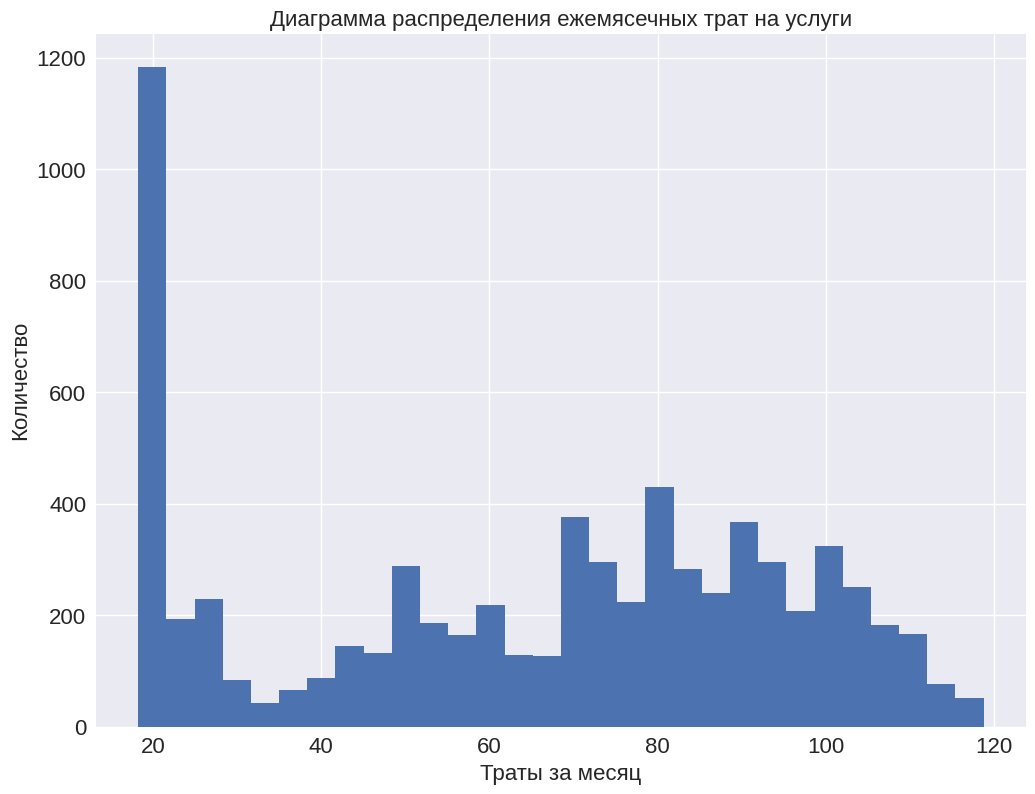

In [ ]:
df_contract.hist(bins=30, figsize=(12, 9))
plt.title('Диаграмма распределения ежемясечных трат на услуги')
plt.xlabel('Траты за месяц')
plt.ylabel('Количество');

In [ ]:
df_contract.Type.value_counts()

Type
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [ ]:
df_contract.PaperlessBilling.value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

In [ ]:
df_contract.PaymentMethod.value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [ ]:
df_contract.TotalCharges.value_counts()

TotalCharges
           11
20.45       6
101.0       5
21.53       4
40.1        4
           ..
4357.5      1
3509.55     1
2530.8      1
2599.1      1
7251.82     1
Name: count, Length: 6658, dtype: int64

В датасете contract 7043 записей, пропусков нет.  
Признаки BeginDate, EndDate необхоимо привести к типу даты.  
EndDate - нащ целевой признак. Всего 1101 запись. Это клиенты котоые ушли. Значит у нас дисбаланс классов.  
Type имеет три уникальных значения, распределены значения в соотношении 2:1:1.  
PaperlessBilling имеет два уникальных значения. Большинство пользуется безналичным расчетом.  
PaymentMethod имеет 4 уникальных значения с лидером электронным чеком, остальных равномерны распределены.  
MonthlyCharges Имеет пик в начале графика. Можно визуально расделить на три группы, по возрастаию цены.  
TotalCharges Необхдимо привести к числовому типу значений.

In [ ]:
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [ ]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [ ]:
df_personal['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [ ]:
df_personal.SeniorCitizen.mean()

0.1621468124378816

In [ ]:
df_personal['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [ ]:
df_personal['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [ ]:
df_personal['Dependents'].value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

В датасете personal 7043 записей, пропусков нет.  
Все признаки бинарные.  
Различий по полу и по партнерам нет. Датасет можно считать, разделен ровно 50 на 50.  
Количество опытных(пенсионеров) клиентов состовляет 16 процентов.  
Почти у каждого третьего клиента на иждивении находится кто-то.

In [ ]:
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [ ]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [ ]:
df_internet.InternetService.value_counts()

InternetService
Fiber optic    3096
DSL            2421
Name: count, dtype: int64

In [ ]:
df_internet.OnlineSecurity.value_counts()

OnlineSecurity
No     3498
Yes    2019
Name: count, dtype: int64

In [ ]:
df_internet.OnlineBackup.value_counts()

OnlineBackup
No     3088
Yes    2429
Name: count, dtype: int64

In [ ]:
df_internet.DeviceProtection.value_counts()

DeviceProtection
No     3095
Yes    2422
Name: count, dtype: int64

In [ ]:
df_internet.TechSupport.value_counts()

TechSupport
No     3473
Yes    2044
Name: count, dtype: int64

In [ ]:
df_internet.StreamingTV.value_counts()

StreamingTV
No     2810
Yes    2707
Name: count, dtype: int64

In [ ]:
df_internet.StreamingMovies.value_counts()

StreamingMovies
No     2785
Yes    2732
Name: count, dtype: int64

В датасете internet 5517 записей, пропусков нет.  
Все признаки бинарные. Приводить к типу не нужно.  
43,8 % Клиентов* Пользуются DSL.  
36,5 % Клиентов* Пользуются услугой блокировка небезопасных сайтов.  
43,9 % Клиентов* Пользуются услугой интернет-безопасность.  
37 % Клиентов* Пользуются услугой технической поддержки.  
49 % Клиентов* Пользуются услугой стримингового телевидения.  
49,5 % Клиентов* Пользуются услугой каталог фильмов.   
Клиентов* - имееются ввиду клиенты, у которых услуга интернет имеется, а не в целом.

In [ ]:
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [ ]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [ ]:
df_phone.MultipleLines.value_counts()

MultipleLines
No     3390
Yes    2971
Name: count, dtype: int64

В датасете phone 6361 записей, пропусков нет.  
Все признаки бинарные. Приводить к типу не нужно.    
Всего 42,1 % Клиентов используют несколько линий для звонков.

# 2. Основная часть проекта

In [ ]:
pip install phik

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 11.6 MB/s eta 0:00:00


In [ ]:
!pip install scikit-learn==1.1.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 12.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.11 requires scikit-learn>=1.3.2, but you have scikit-learn 1.1.3 which is incompatible.
bigframes 1.11.1 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.


In [ ]:
import seaborn as sns
import numpy as np
import time
import matplotlib
import lightgbm as lgb
from datetime import date
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    roc_auc_score,
    roc_curve,
    accuracy_score,
    confusion_matrix
)
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder
)
from sklearn.model_selection import (
    GridSearchCV
)
import phik
from phik import report
from phik.report import plot_correlation_matrix
# импортируем нужные библиотеки

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
RANDOM_STATE = 50623

## Предобработка данных

### Изучить пропущенные значения в данных

In [ ]:
df_contract = df_contract.set_index('customerID')
df_internet = df_internet.set_index('customerID')
df_personal = df_personal.set_index('customerID')
df_phone = df_phone.set_index('customerID')
# устанавливаем индексом уникальный ключ customerID

In [ ]:
data = df_contract.join([df_personal, df_internet, df_phone])
# объединили наши данные в один датасет

In [ ]:
data.info() #

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   gender            7043 non-null   object 
 8   SeniorCitizen     7043 non-null   int64  
 9   Partner           7043 non-null   object 
 10  Dependents        7043 non-null   object 
 11  InternetService   5517 non-null   object 
 12  OnlineSecurity    5517 non-null   object 
 13  OnlineBackup      5517 non-null   object 
 14  DeviceProtection  5517 non-null   object 
 15  TechSupport       5517 non-null   object 
 16  StreamingTV       5517 non-null 

In [ ]:
data = data.fillna('No') # Заполняем пропуски значением No

У нас имееются пропуски. Они наблюдаются во всех бинарных признаках у которых вариация значений YES, NO, то мы заменим пропуски значением No. Только в столбце InternetService другая вариация, но значение NO подходит под смысл признака, и заменяем пропуски и в этом столбце.

In [ ]:
def rename(name):
    name = name.replace(name[0], name[0].lower())
    name = name.replace(name[-1], name[-1].lower())
    for i in range(len(name)):
        if name[i].isupper():
            index = name.find(name[i])
            name = name.replace(name[i], name[i].lower())
            name = name[:index] + '_' + name[index:]
    return name

for i in range(len(data.columns)):
    x=data.columns[i]
    x2=rename(x)
    data = data.rename(columns={x:x2})
# приводим к одному виду названия стобцов

In [ ]:
data.isna().sum() # проверяем пропуски

begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
multiple_lines       0
dtype: int64

Мы проверили явные пропуски. Но у нас возможно есть неявные пропуски в столбце total_charges.

In [ ]:
list(data['total_charges'].unique())

['31.04',
 '2071.84',
 '226.17',
 '1960.6',
 '353.5',
 '1150.96',
 '2058.21',
 '300.48',
 '3573.68',
 '1628.35',
 '649.35',
 '312.3',
 '6111.31',
 '5496.1',
 '2637.5',
 '2491.5',
 '1106.01',
 '8257.51',
 '789.36',
 '1891.05',
 '118.95',
 '237.6',
 '61.05',
 '3821.62',
 '3212.44',
 '726.09',
 '5215.88',
 '96.04',
 '6498.0',
 '1294.0',
 '5395.6',
 '194.82',
 '1928.93',
 '22.22',
 '45.25',
 '5794.2',
 '557.6',
 '3440.8',
 '4211.46',
 '1369.9',
 '495.5',
 '4428.8',
 '352.75',
 '5030.55',
 '990.6',
 '4140.5',
 '98.5',
 '241.95',
 '4395.82',
 '4780.46',
 '3880.75',
 '1684.7',
 '1807.0',
 '887.15',
 '4491.0',
 '1813.55',
 '6277.95',
 '7730.32',
 '890.72',
 '7740.0',
 '4723.5',
 '3685.9',
 '3304.01',
 '1008.58',
 '944.0',
 '243.97',
 '3930.8',
 '2455.2',
 '1007.5',
 '870.37',
 '52.48',
 '1060.8',
 '7142.4',
 '1503.5',
 '193.5',
 '6435.52',
 '2764.69',
 '437.2',
 '2287.35',
 '414.4',
 '238.05',
 '600.53',
 '834.92',
 '4446.79',
 '987.35',
 '893.7',
 '2327.52',
 '991.2',
 '917.7',
 '978.75',
 '2

У нас есть значение `' '` в столбце, заменим его на 0.

In [ ]:
data['total_charges'] = data['total_charges'].replace(' ', 0)

### Рассмотреть типы данных в каждом столбце

Из предварительного анализа мы выяснили, что у признаков begin_date, end_date необходимо поменять тип на дату.  
total_charges поменять на вещественный тип данных.  
senior_citizen в булевый тип данных или строковый.

Чтобы заполнить end_date необходимо заменить NO на дату. Возьмем дату актуальности датасета 2020-02-01.

In [ ]:
data['begin_date'] = pd.to_datetime(data['begin_date'], format='%Y-%m-%d') # преобразовали данные

In [ ]:
data['end_date'] = data['end_date'].replace('No', '2020-02-01')

In [ ]:
data['end_date'] = pd.to_datetime(data['end_date'], format='%Y-%m-%d') # преобразовали данные

In [ ]:
data['total_charges'] = data['total_charges'].astype('float64')

In [ ]:
data['senior_citizen'] = data['senior_citizen'].astype('object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin_date         7043 non-null   datetime64[ns]
 1   end_date           7043 non-null   datetime64[ns]
 2   type               7043 non-null   object        
 3   paperless_billing  7043 non-null   object        
 4   payment_method     7043 non-null   object        
 5   monthly_charges    7043 non-null   float64       
 6   total_charges      7043 non-null   float64       
 7   gender             7043 non-null   object        
 8   senior_citizen     7043 non-null   object        
 9   partner            7043 non-null   object        
 10  dependents         7043 non-null   object        
 11  internet_service   7043 non-null   object        
 12  online_security    7043 non-null   object        
 13  online_backup      7043 non-null   object        
 14

Ранее мы изучили уникальные значения во всех категориальных признаках таблицы. Большинство признаков бинарные.  
Только type, payment_method, internet_service имеют более двух хначений.  
Неявных дубликатов в датасете нет.

### Добавьть в таблицу новые столбцы(сгенерировать новый признак)

Выделим таргет и сгенируем новый признак. Новый признак будет у нас время пользования - Дата заключения договора минус Дата окончания. Ранее мы проставили всем клиентам дата окончания `2020-02-01`.

In [ ]:
data['abandon'] = np.where(data['end_date'] != '2020-02-01', 0 ,1)

In [ ]:
data.abandon.describe() # Всего 15,6 процента, у нас дизбаланс классов.

count    7043.000000
mean        0.843675
std         0.363189
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: abandon, dtype: float64

In [ ]:
data['time_of_use'] = (data['end_date'] - data['begin_date']).dt.days # выделяем новый признак

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin_date         7043 non-null   datetime64[ns]
 1   end_date           7043 non-null   datetime64[ns]
 2   type               7043 non-null   object        
 3   paperless_billing  7043 non-null   object        
 4   payment_method     7043 non-null   object        
 5   monthly_charges    7043 non-null   float64       
 6   total_charges      7043 non-null   float64       
 7   gender             7043 non-null   object        
 8   senior_citizen     7043 non-null   object        
 9   partner            7043 non-null   object        
 10  dependents         7043 non-null   object        
 11  internet_service   7043 non-null   object        
 12  online_security    7043 non-null   object        
 13  online_backup      7043 non-null   object        
 14

In [ ]:
data.time_of_use.describe()

count    7043.000000
mean      898.555729
std       683.130510
min         0.000000
25%       276.000000
50%       761.000000
75%      1461.000000
max      2314.000000
Name: time_of_use, dtype: float64

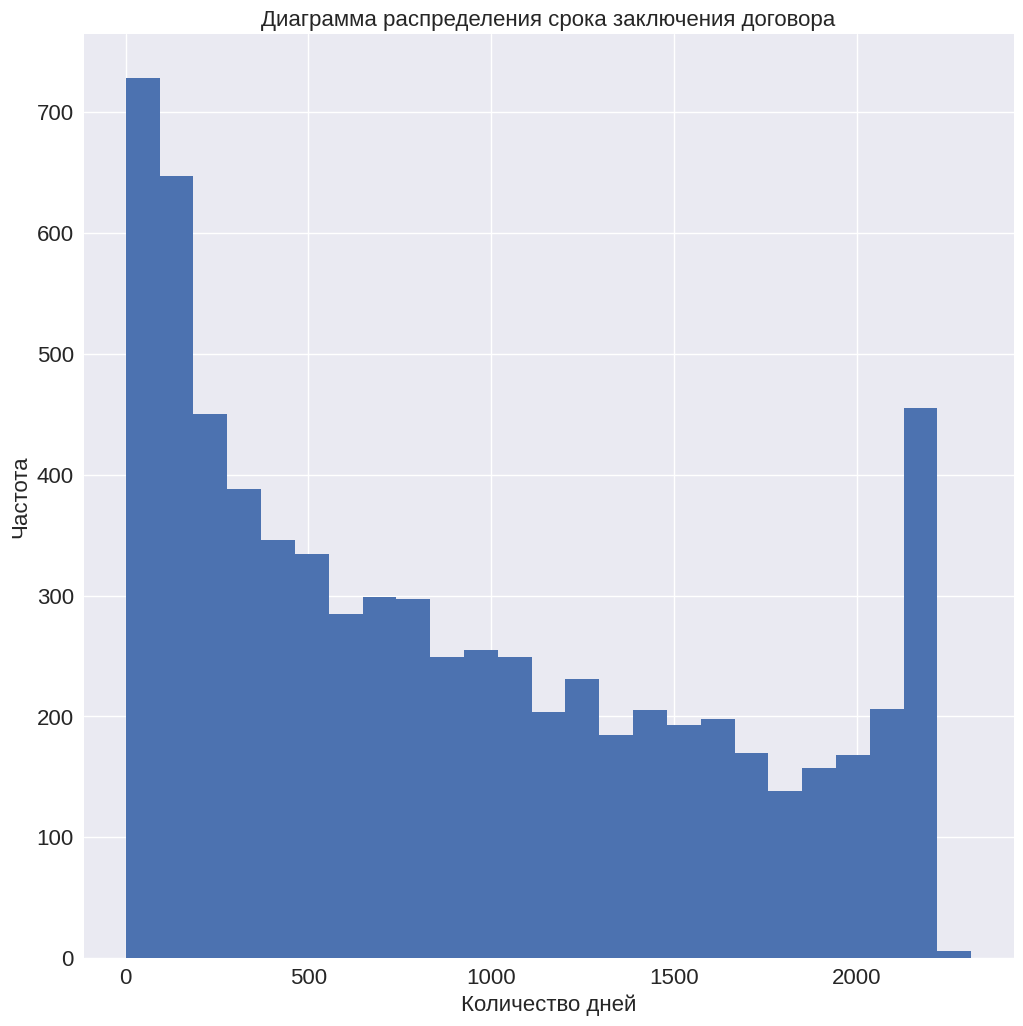

In [ ]:
data['time_of_use'].hist(bins=25, figsize=(12, 12))
plt.title('Диаграмма распределения срока заключения договора')
plt.xlabel('Количество дней')
plt.ylabel('Частота');

График у нас идет по неспадающей, причем до 1700 дней далее идет по возрастающей. Среднее у нас 898 дней, медиана 761.

Мы сделали предобработку данных:  
- привели данные к нужному типу,
- изучили и заполнили пропуски в данных,
- сгенирировали новый признак,
- выделили таргет (3.3 пункт плана перенес сюда)

## Исследовательский анализ данных

### Изучить все признаки объекта и Изучить взаимосвязь между признаками

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin_date         7043 non-null   datetime64[ns]
 1   end_date           7043 non-null   datetime64[ns]
 2   type               7043 non-null   object        
 3   paperless_billing  7043 non-null   object        
 4   payment_method     7043 non-null   object        
 5   monthly_charges    7043 non-null   float64       
 6   total_charges      7043 non-null   float64       
 7   gender             7043 non-null   object        
 8   senior_citizen     7043 non-null   object        
 9   partner            7043 non-null   object        
 10  dependents         7043 non-null   object        
 11  internet_service   7043 non-null   object        
 12  online_security    7043 non-null   object        
 13  online_backup      7043 non-null   object        
 14

In [ ]:
corrMatrix = data[['monthly_charges', 'total_charges', 'abandon', 'time_of_use']].corr()
corrMatrix

,monthly_charges,total_charges,abandon,time_of_use
monthly_charges,1.000000,0.630440,-0.154286,0.220054
total_charges,0.630440,1.000000,-0.052175,0.821746
abandon,-0.154286,-0.052175,1.000000,-0.016578
time_of_use,0.220054,0.821746,-0.016578,1.000000


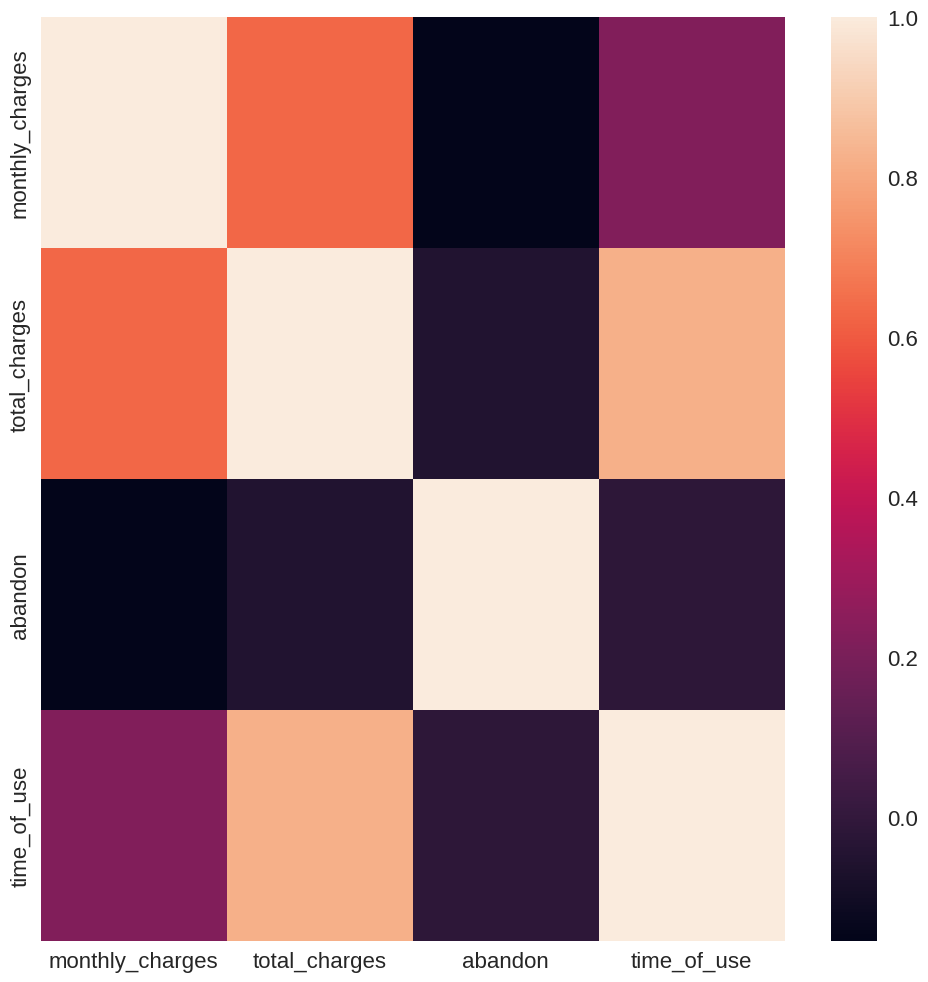

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(corrMatrix, annot=False);

Построили heatmap для количественных признаков. Можно сразу заметить сильную корреляцию между ежемесячными платежами и всего платежами.  Сильная корреляция между количеством дней заключения контракта и `total_charges`, что вполне логично, чем больше пользуешься услугами, тем больше общий итог.   
Посмотрим на картину в общем, с помощью фи-корреляции для смешанного набора признаков, уберем из датасета даты.

interval columns not set, guessing: ['monthly_charges', 'total_charges', 'abandon', 'time_of_use']
interval columns not set, guessing: ['monthly_charges', 'total_charges', 'abandon', 'time_of_use']
interval columns not set, guessing: ['monthly_charges', 'total_charges', 'abandon', 'time_of_use']


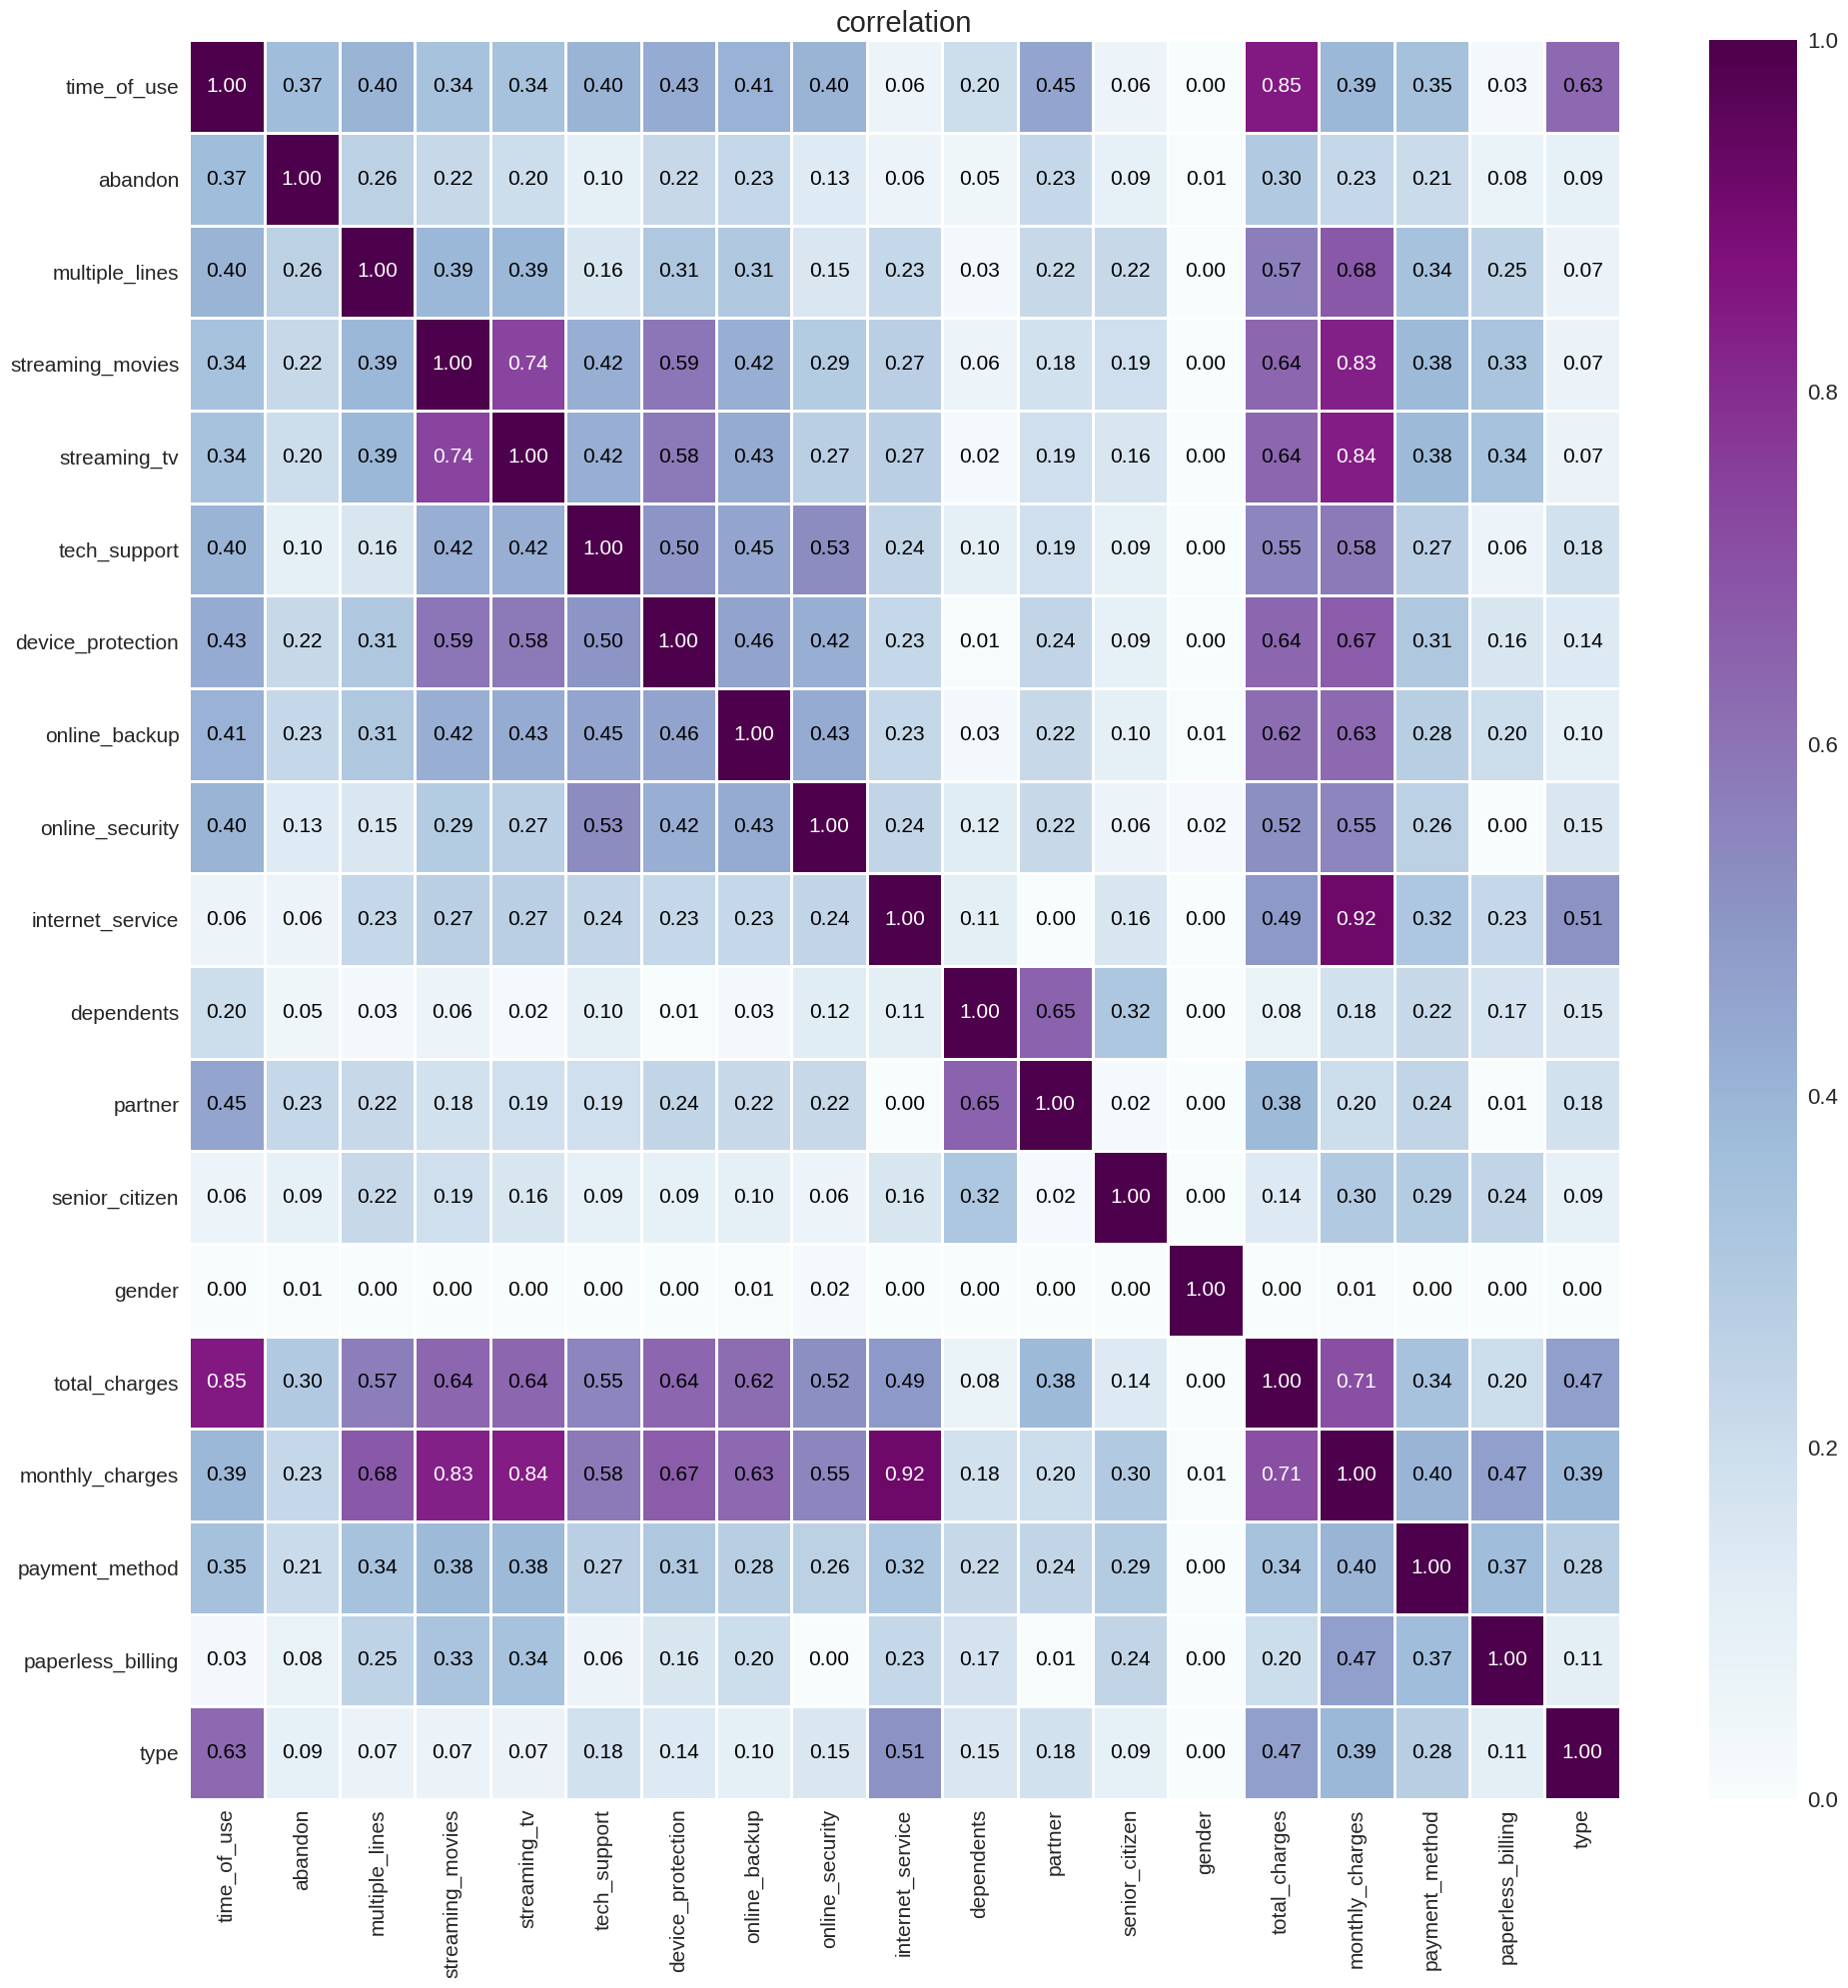

In [ ]:
plot_correlation_matrix(data.drop(['begin_date', 'end_date'], axis=1).phik_matrix().round(2).values,
                        x_labels=data.drop(['begin_date', 'end_date'], axis=1).phik_matrix().columns,
                        y_labels=data.drop(['begin_date', 'end_date'], axis=1).phik_matrix().index,
                        vmin=0, vmax=1, color_map='BuPu',
                        fontsize_factor=1.5, figsize=(20,20))

Фи-корреляция показывает взаимосвязь признаков.  
Самые слабо коррелированы признаки `gender` и `dependents`. В-первом случае, у нас в датасете распределены даные 50 на 50. Во-втором случае, у нас имеется сильная корреляция с признаками `partner` и `senior_citzen`, что логично по смыслу логично.   
Можно заметить, что услуги интернета имеют среднюю корреляцию. Отметим, что стриминговое телевидение и кино имееют сильную корреляцию. Удялять признаки не будем, так как, для обучения будем использовать деревянные модели.  

### Сделать визуализацию графиков

Мы подготовили наш дататасет, теперь визуализируем информацию которую раньше получили.

Ранее выводы полученные из датасета.  
Различий по полу и по партнерам нет. Датасет можно считать, разделен ровно 50 на 50.  
Количество опытных(пенсионеров) клиентов состовляет 16 процентов.  
Почти у каждого третьего клиента на иждивении находится кто-то.  

Всего 42,1 % Клиентов используют несколько линий для звонков.

43,8 % Клиентов* Пользуются DSL.  
36,5 % Клиентов* Пользуются услугой блокировка небезопасных сайтов.  
43,9 % Клиентов* Пользуются услугой интернет-безопасность.  
37 % Клиентов* Пользуются услугой технической поддержки.  
49 % Клиентов* Пользуются услугой стримингового телевидения.  
49,5 % Клиентов* Пользуются услугой каталог фильмов.  
Клиентов* - имееются ввиду клиенты, у которых услуга интернет имеется, а не в целом.  

In [ ]:
data['total_charges'].describe()

count    7043.000000
mean     2115.312885
std      2112.742814
min         0.000000
25%       436.750000
50%      1343.350000
75%      3236.690000
max      9221.380000
Name: total_charges, dtype: float64

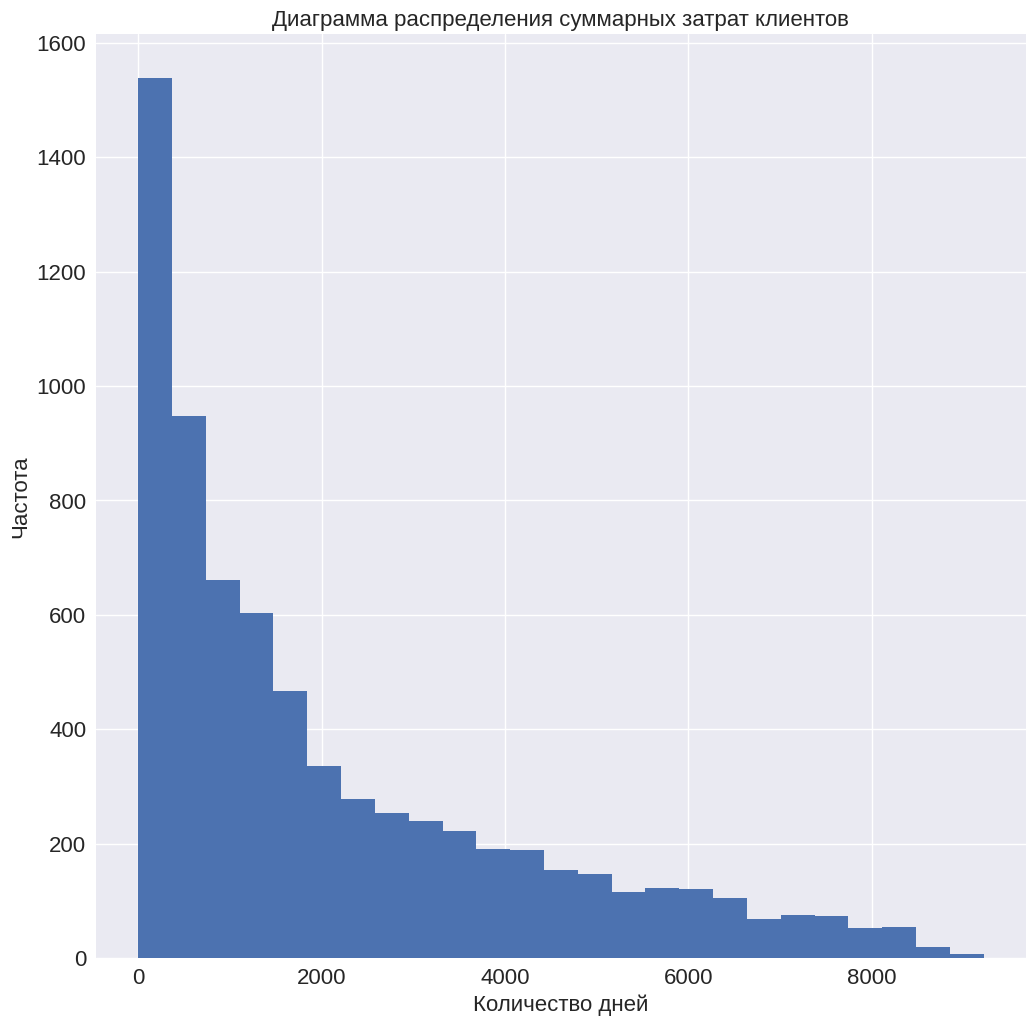

In [ ]:
data['total_charges'].hist(bins=25, figsize=(12, 12))
plt.title('Диаграмма распределения суммарных затрат клиентов')
plt.xlabel('Количество дней')
plt.ylabel('Частота');

<div class="alert alert-block alert-info">
График похож на экспоненциальное рапределение, с медианой 1343 и средним значение 2115. 75% выборки расположены до 3200 дней.
</div>

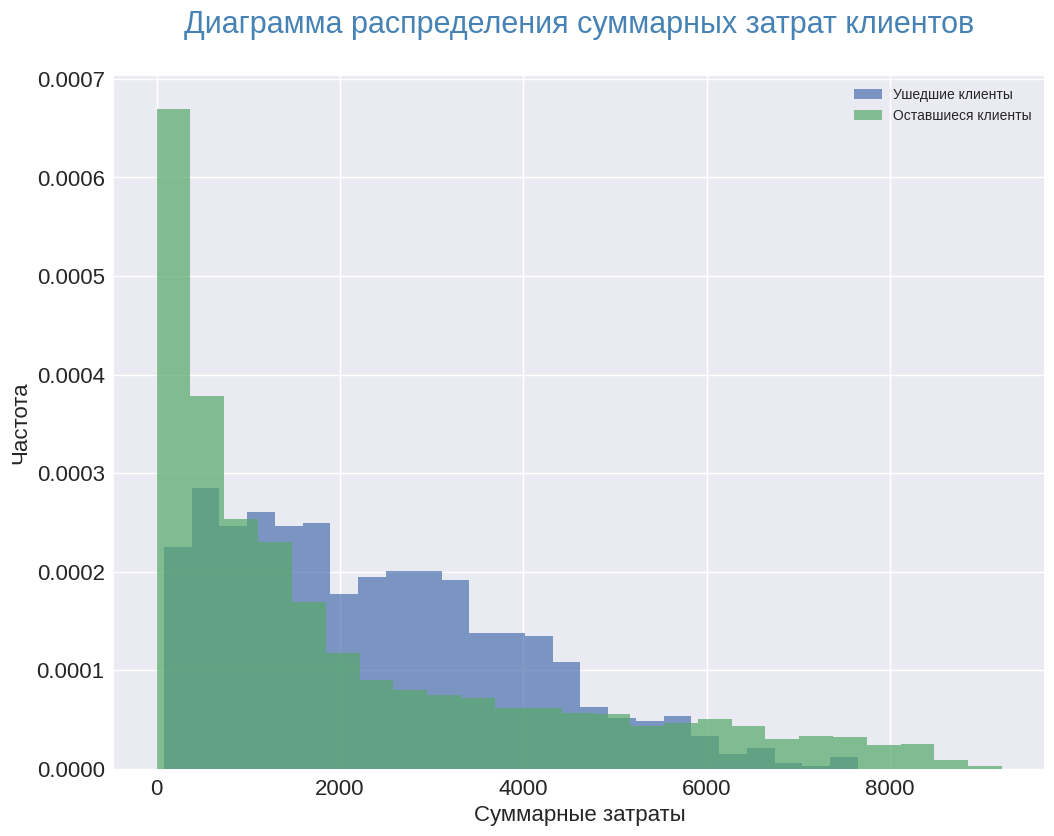

In [ ]:
alpha = 0.7
lw = 2
axs = data.groupby('abandon')['total_charges'].hist(figsize=(12,9), bins=25, linewidth=lw, alpha=alpha, density=True, legend=True)
plt.title('Диаграмма распределения суммарных затрат клиентов' + "\n", fontsize = 22, color = 'SteelBlue')
plt.legend(['Ушедшие клиенты', 'Оставшиеся клиенты'])
plt.xlabel('Суммарные затраты')
plt.ylabel('Частота');

<div class="alert alert-block alert-info">
Мы видим их различие. Ушедших клиентов есть пик на 3000. И график ступеньчатый.

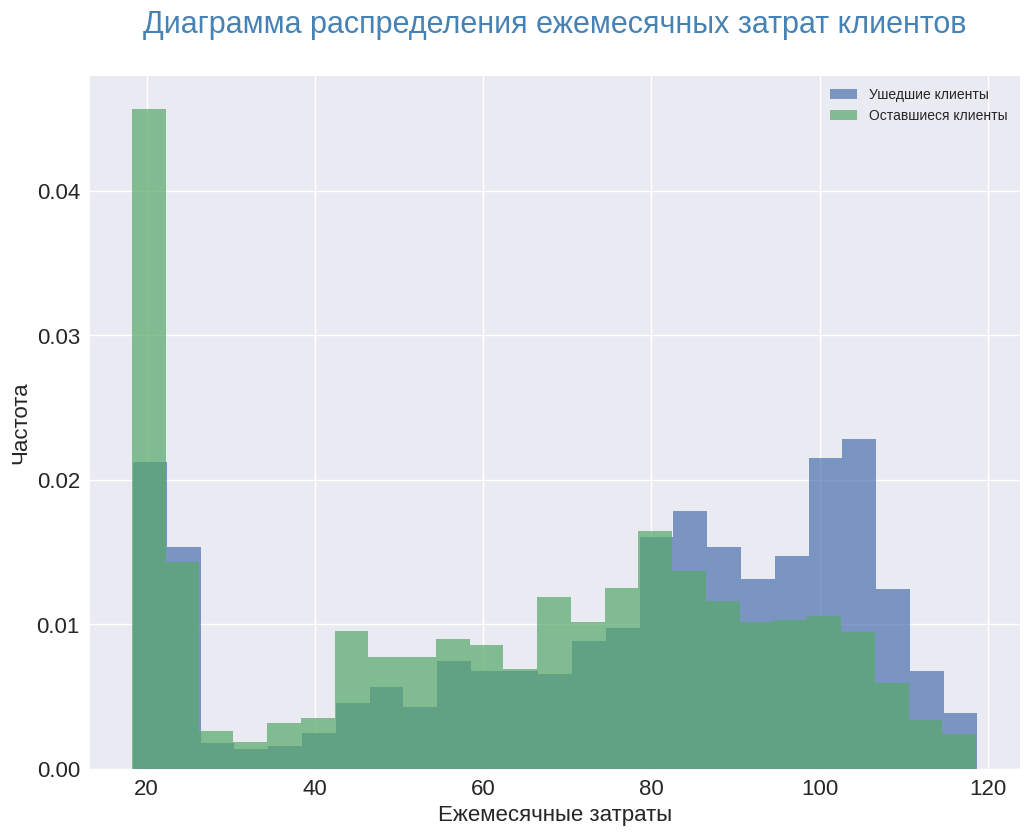

In [ ]:
alpha = 0.7
lw = 2
axs = data.groupby('abandon')['monthly_charges'].hist(figsize=(12,9), bins=25, linewidth=lw, alpha=alpha, density=True, legend=True)
plt.title('Диаграмма распределения ежемесячных затрат клиентов' + "\n", fontsize = 22, color = 'SteelBlue')
plt.legend(['Ушедшие клиенты', 'Оставшиеся клиенты'])
plt.xlabel('Ежемесячные затраты')
plt.ylabel('Частота');

В случае ушедших клиентов, распределение смещено в сторону более высоких платежей. Видим пик на значении 105.


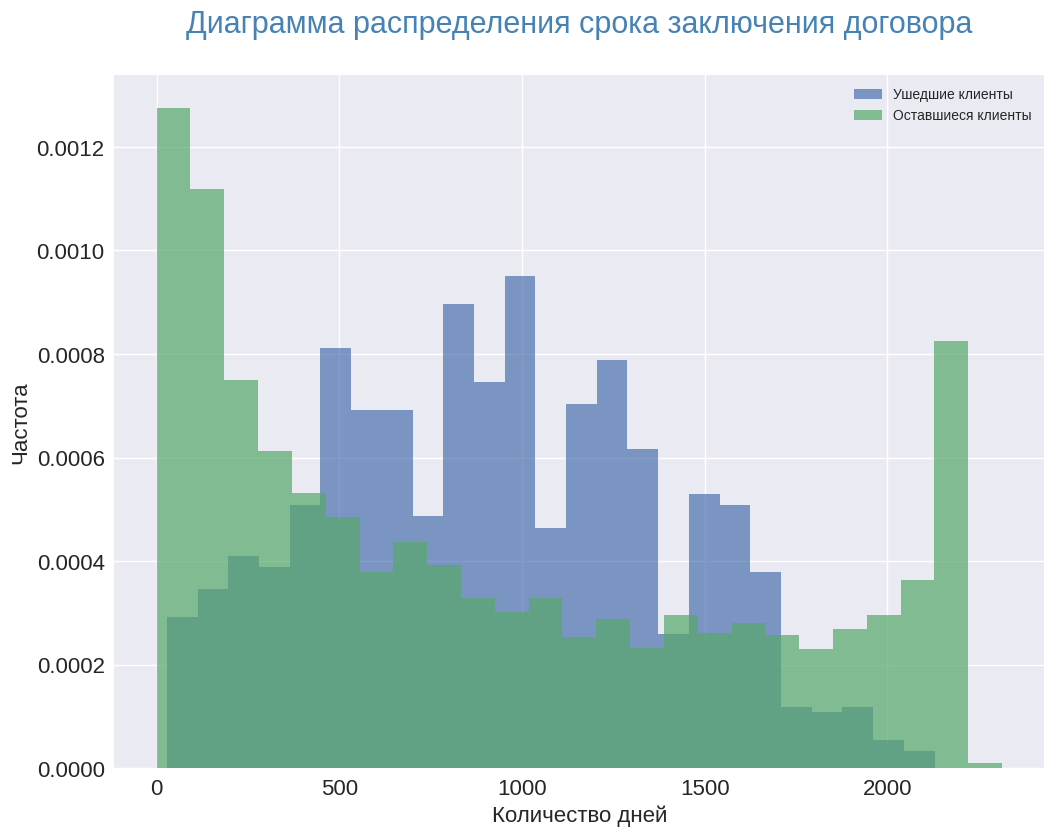

In [ ]:
alpha = 0.7
lw = 2
axs = data.groupby('abandon')['time_of_use'].hist(figsize=(12,9), bins=25, linewidth=lw, alpha=alpha, density=True, legend=True)
plt.title('Диаграмма распределения срока заключения договора' + "\n", fontsize = 22, color = 'SteelBlue')
plt.legend(['Ушедшие клиенты', 'Оставшиеся клиенты'])
plt.xlabel('Количество дней')
plt.ylabel('Частота');

На графике видно, что количество дней ушедших, можно предположить, что нормально распределено с незначительными выбросами.

In [ ]:
matplotlib.rcParams['figure.figsize'] = (12,9)

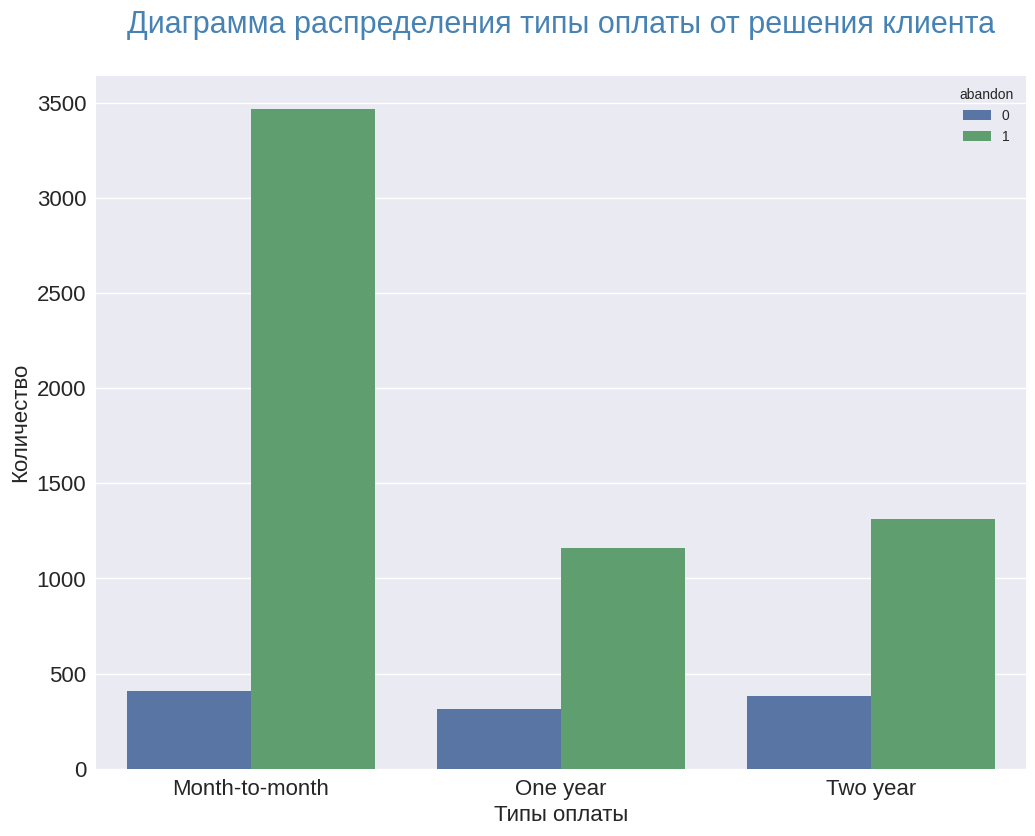

In [ ]:
sns.countplot(x='type', hue='abandon', data=data)
plt.title('Диаграмма распределения типы оплаты от решения клиента' + "\n", fontsize = 22, color = 'SteelBlue')
plt.xlabel('Типы оплаты')
plt.ylabel('Количество');

- ушедшие клиенты в основном брали помесячный тип оплаты

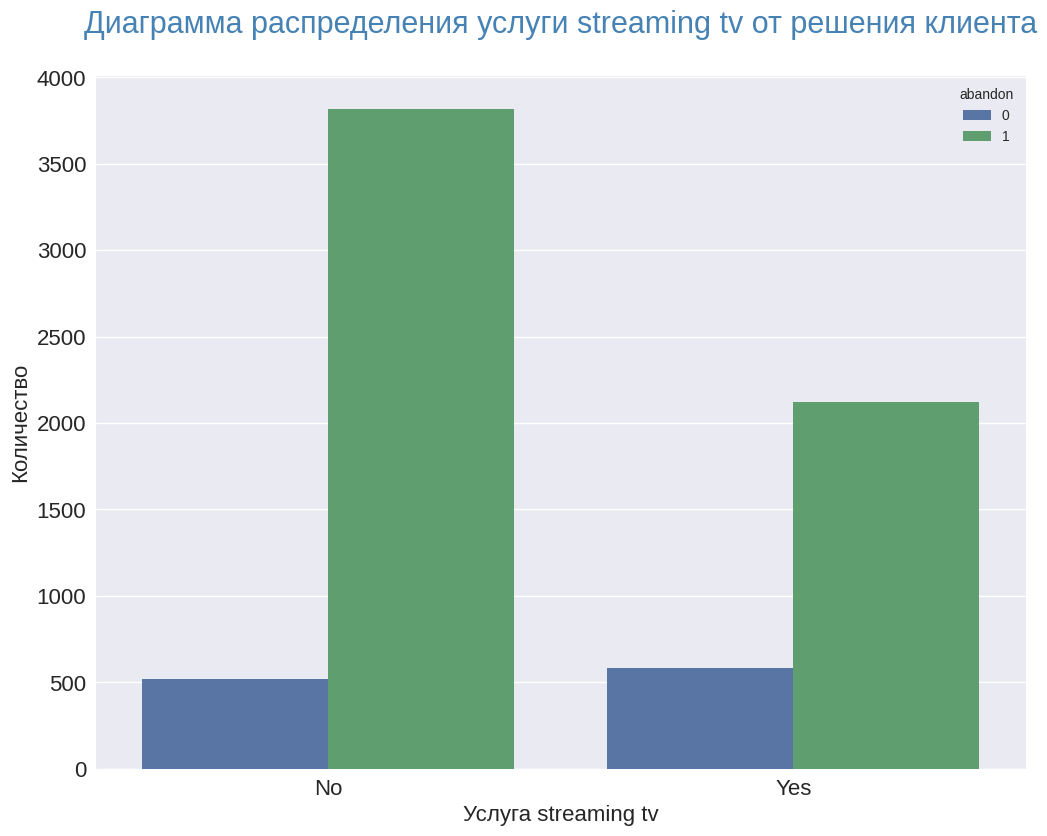

In [ ]:
sns.countplot(x='streaming_tv', hue='abandon', data=data)
plt.title('Диаграмма распределения услуги streaming tv от решения клиента' + "\n", fontsize = 22, color = 'SteelBlue')
plt.xlabel('Услуга streaming tv')
plt.ylabel('Количество');

На графике вне зависимости подключена услуга или нет число ушедших клиентов постоянно и не меняется. Аналогично с прошлой ситуацией корреляция слабая 0.2


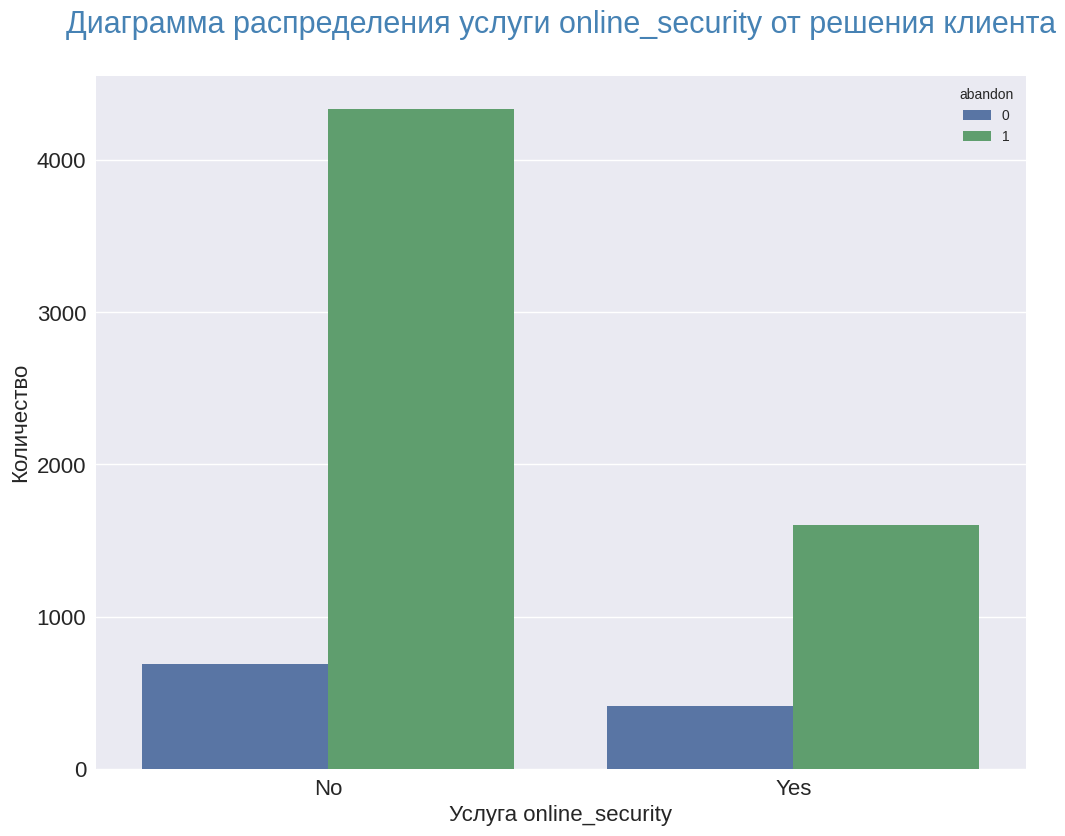

In [ ]:
sns.countplot(x='online_security', hue='abandon', data=data)
plt.title('Диаграмма распределения услуги online_security от решения клиента' + "\n", fontsize = 22, color = 'SteelBlue')
plt.xlabel('Услуга online_security')
plt.ylabel('Количество');

 Аналогичная ситуация, что и на прошлом графике, вне зависимости подлючения услуги число ушедших клиентов на одном уровне. Корреляция состовляет 0.13


## Анализ моделей

### Подготовить выборки для обучения моделей;

In [ ]:
target = data['abandon'] # извлекаем признаки и целевой признак
features = data.drop(['abandon', 'begin_date', 'end_date'], axis=1)

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=RANDOM_STATE, stratify=target)

In [ ]:
# Мы разделили наши данные на соотношение (3,1)
print('Размер обучающей выборки:',features_train.shape[0])
print('Размер тестирующей выборки:',features_test.shape[0])

Размер обучающей выборки: 5282
Размер тестирующей выборки: 1761


In [ ]:
objects = features_train.select_dtypes(include='object').columns.to_list()
objects

['type',
 'paperless_billing',
 'payment_method',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'multiple_lines']

In [ ]:
numeric = ['monthly_charges', 'total_charges', 'time_of_use']

In [ ]:
scaler = StandardScaler() # Масштабируем признаки
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [ ]:
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

# обучаем энкодер на заданных категориальных признаках тренировочной выборки
encoder_ohe.fit(features_train[objects])

# добавляем закодированные признаки в features_train
# encoder_ohe.get_feature_names_out() позволяет получить названия колонок
features_train[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_train[objects])

# удаляем незакодированные категориальные признаки (изначальные колонки)
features_train = features_train.drop(objects, axis=1)

In [ ]:
# кодируем на тесте
encoder_ohe.fit(features_test[objects])

features_test[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_test[objects])

features_test = features_test.drop(objects, axis=1)

In [ ]:
features_train

,monthly_charges,total_charges,time_of_use,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,gender_Male,...,dependents_Yes,internet_service_Fiber optic,internet_service_No,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,multiple_lines_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
0895-UADGO,-0.670516,-0.829357,-0.953828,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
8203-XJZRC,-1.478390,-0.989457,-1.267906,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5155-AZQPB,-0.492651,-0.333649,-0.061495,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0506-LVNGN,0.360105,-0.688212,-0.953828,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6261-LHRTG,-0.331408,-0.321122,-0.151022,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6828-HMKWP,-1.451794,-0.878794,-0.777710,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-NWRPA,1.158006,-0.335315,-0.686715,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
9821-POOTN,0.348469,-0.413511,-0.647089,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Обучить разные модели, одна из которых — бустинг, другая — не бустинг

Возьмем две модели случайный лес и бустинг - LGBM. Сначала случайный лес.

Комментарий: следующая модель долго считает 8min 53s

In [ ]:
%%time
model_rf = RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced')

params = {'max_depth':range(4,10),
          'n_estimators': range(50, 200, 5)
        }
grid_rf = GridSearchCV(model_rf, params, cv=5, scoring='roc_auc', n_jobs=4, verbose=2)
grid_rf.fit(features_train, target_train);
print('Лучшие параметры для случайного леса:', grid_rf.best_params_)
print('Оценка кацества модели roc_auc:', grid_rf.best_score_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Лучшие параметры для случайного леса: {'max_depth': 6, 'n_estimators': 105}
Оценка кацества модели roc_auc: 0.8174177794420308
CPU times: user 10.5 s, sys: 1.01 s, total: 11.5 s
Wall time: 6min 45s


Лучшие параметры для случайного леса: {'max_depth': 6, 'n_estimators': 105}   
Оценка кацества модели roc_auc: 0.8174177794420308

Получили результат не устаивающий ТЗ roc_auc >= 0.85, переходим к следующей модели.  

Комментарий: следующая модель долго считает 20 мин. Но результат хороший.

In [ ]:
%%time
model_lgbm = LGBMClassifier(random_state=RANDOM_STATE, class_weight='balanced')

params = {'learning_rate':[0.1, 0.2, 0.25, 0.3],
          'n_estimators': [100, 300, 500, 1000, 1500],
          'max_depth':range(1,7)
         }
grid_lgbm = GridSearchCV(model_lgbm, params, cv=5, scoring='roc_auc', n_jobs=4, verbose=2)
grid_lgbm.fit(features_train, target_train);
print('Лучшие параметры для LGBM:', grid_lgbm.best_params_)
print('Оценка кацества модели roc_auc:', grid_lgbm.best_score_)

Выходные данные были обрезаны до нескольких последних строк (5000).
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

Exception ignored on calling ctypes callback function: <function _log_callback at 0x78134aff9900>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py", line 255, in _log_callback
    def _log_callback(msg: bytes) -> None:
KeyboardInterrupt: 


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

KeyboardInterrupt: 

Получили наш результат roc_auc > 0.85.
Лучшие параметры для LGBM: {'learning_rate': 0.25, 'max_depth': 2, 'n_estimators': 1000}  
Подобрали лучшие параметры, теперь проверим на тестовой выборке и определим важность признаков.

In [ ]:
feature_importance = pd.DataFrame({'feature': list(features_train.columns),
                                   'feature_importance': grid_lgbm.best_estimator_.feature_importances_})

In [ ]:
feature_importance.sort_values('feature_importance', ascending=False)

Можно отметить, что значительную важность у нас имеют три признака, остальные мало влияют на таргет.  
Наибольшую роль вносит признак `количество дней заключения договора`, далее оплата ежемесячная и суммарная.

### Тестирование модели

In [ ]:
model_lgbm = LGBMClassifier(random_state=RANDOM_STATE,
                           class_weight='balanced',
                           learning_rate=0.25,
                           n_estimators=1000,
                           max_depth=2)
model_lgbm.fit(features_train, target_train)
predicted_test = model_lgbm.predict(features_test)
accuracy = accuracy_score(target_test, predicted_test)
probabilities_test = model_lgbm.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print("Результат accuracy:", accuracy)
print("Результат auc_roc:", auc_roc)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4456, number of negative: 826
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 728
[LightGBM] [Info] Number of data points in the train set: 5282, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

Модель на тесте показала себе отлично. Все согласно условиям ТЗ. Визуализируем полученный результат и посмотрим матрицу ошибок.

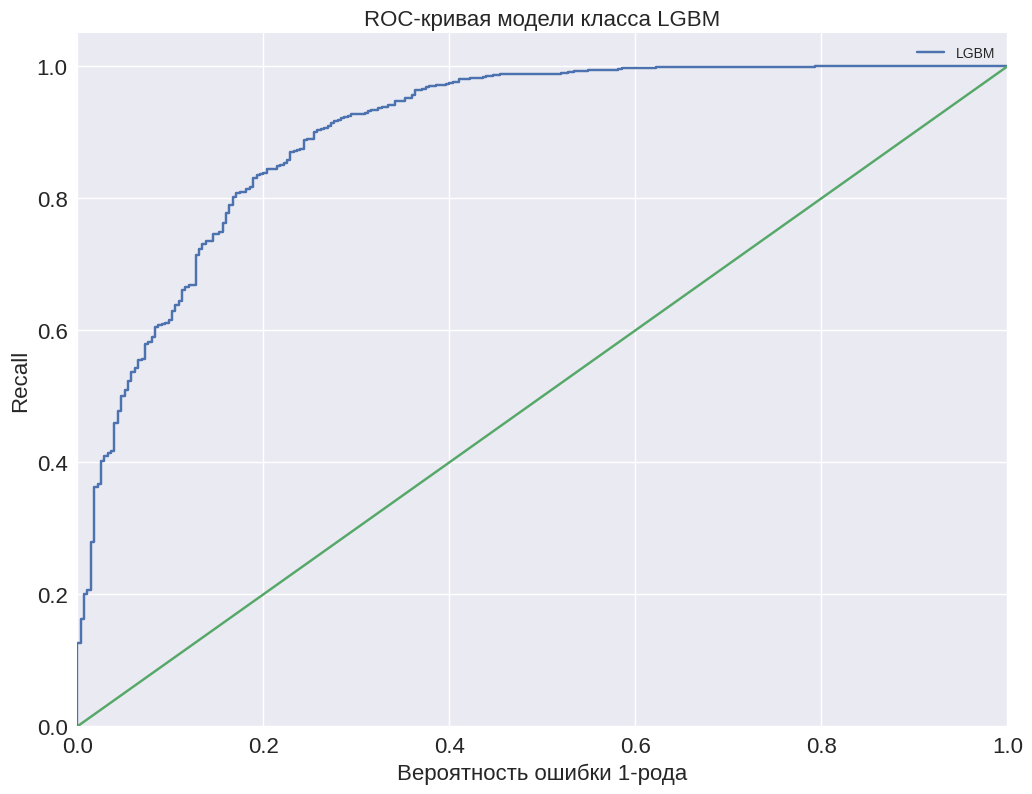

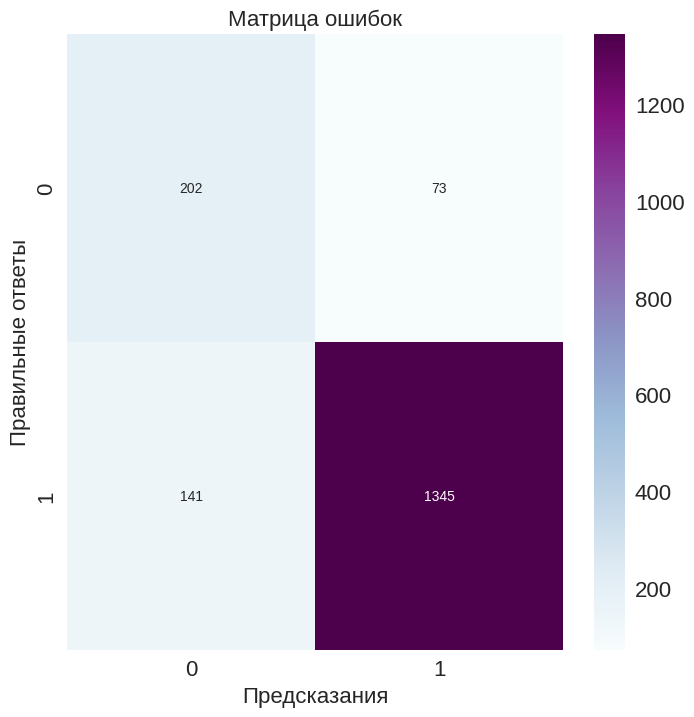

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test, pos_label=1)
plt.plot(fpr, tpr, label='LGBM')
plt.xlabel('Вероятность ошибки 1-рода')
plt.ylabel('Recall')
plt.title('ROC-кривая модели класса LGBM')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend();

cmatrix = confusion_matrix(target_test, predicted_test)
plt.figure(figsize=(8, 8))
sns.heatmap(cmatrix,
            annot=True,
            cmap='BuPu',
            fmt='d').set(title='Матрица ошибок', xlabel='Предсказания', ylabel='Правильные ответы')
plt.show();

Лучшая модель LGBM с параметрами: {'learning_rate': 0.25, 'max_depth': 2, 'n_estimators': 1000}.  
На обучающей выборки получили roc_auc: 0.904 и на тестовой выборки получили auc_roc: 0.901, условиям ТЗ удовлетворяет.  
Посмотрели важность признаков, топ признаков составляют time_of_use, total_charges, monthly_charges.
Построили матрицу ошибок и ROC-кривую.


Итак, входе работы мы:
- Изучили данные датасета;
- Исследовали данные клиентов, составили портрет клиента;
- Обучили несколько моделей для предсказания оттока клиентов;
- Выявили лучшую модель, подобрали параметры, посмотрели важность признаков;
- Построили модель согласно условиям ТЗ.